In [35]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Scatter Plot format

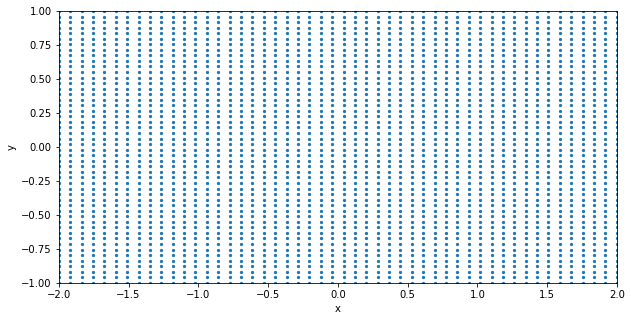

In [36]:
N = 50
x_start, x_end, y_start, y_end = -2, 2, -1, 1
x = np.linspace(x_start,x_end,N, dtype=float)
y = np.linspace(y_start,y_end,N, dtype=float)

X, Y = np.meshgrid(x,y)

width = 10
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.scatter(X,Y, s=5,marker ='o')

## Creating a Source Flow

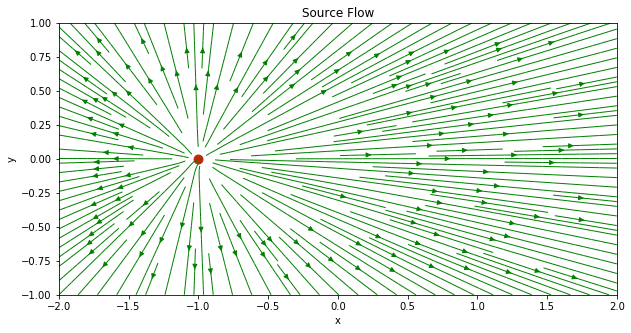

In [37]:
sig_source = 5.0 #source strength (make negative to create a sink)
x_source, y_source = -1.0, 0.0 #source location

u_source = sig_source / (2*np.pi) * (X - x_source) / ((X - x_source)**2 + (Y - y_source)**2)
v_source = sig_source / (2*np.pi) * (Y - y_source) / ((X - x_source)**2 + (Y - y_source)**2)

width = 10
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.title('Source Flow')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_source, v_source, density=2, linewidth=1, arrowsize=1, color='g')
plt.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')


## Creating a Sink Flow 

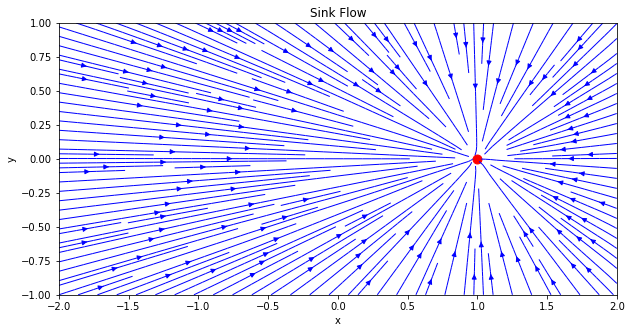

In [38]:
sig_sink = -5.0 #sink strength (make positive to create a source)
x_sink, y_sink = 1.0, 0.0 #sink location

u_sink = sig_sink / (2*np.pi) * (X - x_sink) / ((X - x_sink)**2 + (Y - y_sink)**2)
v_sink = sig_sink / (2*np.pi) * (Y - y_sink) / ((X - x_sink)**2 + (Y - y_sink)**2)

width = 10
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.title('Sink Flow')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_sink, v_sink, density=2, linewidth=1, arrowsize=1, color='b')
plt.scatter(x_sink, y_sink, color='r', s=80, marker='o')

## Source-Sink Pair 

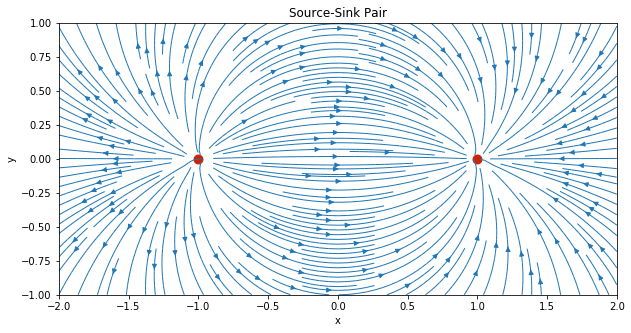

In [39]:
#superposition
u_pair = u_source + u_sink
v_pair = v_source + v_sink

width = 10
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.title('Source-Sink Pair')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_pair, v_pair, density=2, linewidth=1, arrowsize=1)
plt.scatter([x_source, x_sink], [y_source,y_sink], color='#CD2305', s=80, marker='o')

## Plotting Potential Function Using Contour 

In [69]:
phi_source = sig_source/(2*np.pi) * np.log(np.sqrt((X-x_source)**2+(Y-y_source)**2)) 
phi_sink = sig_sink/(2*np.pi) * np.log(np.sqrt((X-x_sink)**2+(Y-y_sink)**2))

phi_pair = phi_source + phi_sink

levels = np.linspace(np.min(phi_pair),np.max(phi_pair), 41)

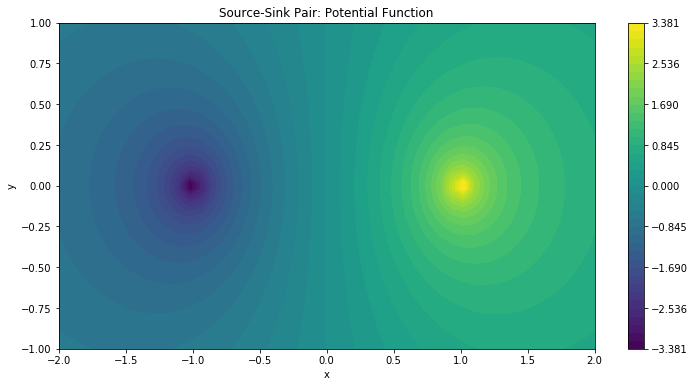

In [75]:
width = 12
height = (y_end - y_start)/(x_end - x_start) * width

plt.figure(figsize=(width, height))
plt.title('Source-Sink Pair: Potential Function')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.contourf(X,Y,phi_pair,cmap = 'viridis', levels =levels)
plt.colorbar()